<a href="https://colab.research.google.com/github/Info-TSI-Vieljeux/pourDS/blob/main/correcDSweb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correction du deuxième DS (TSI2, 2022)

In [1]:
!git clone https://github.com/Info-TSI-Vieljeux/pourDS

Cloning into 'pourDS'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


# L’algorithme PageRank de Google


Cela fait plus de 20 ans que Google domine le marché des moteurs de recherche. Cette longévité semble indiquer une réelle pertinence des résultats fournis.
Depuis sa conception en 1998, l’algorithme de recherche de Google continue d’évoluer et la plupart des améliorations demeurent des secrets industriels. L’idée principale, par contre, est connue puisqu’elle est l’objet d’une célèbre publication de Sergueï Brin et Larry Page (les cofondateurs) : The anatomy of a large-scale hypertextual web search engine. Stanford University, 1998. Le fonctionnement de PageRank, l’algorithme au centre du moteur de recherche, y est détaillé.

##I. Une base de données du Web

Imaginons qu’il existe un registre complet de l’internet structuré sous la forme d’une base de données relationnelle. 
On supposera dans la suite que chaque nouvelle page web créée entraîne un enregistrement sur une base de données constituée des 3 tables décrites ci-dessous :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/tableDS1.png?raw=true"/>

Le contenu des trois tables pour un internet lilliputien imaginaire :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/tableDS2.png?raw=true"/>

1. Que désignent les deux colonnes dans les
trois premiers tableaux (présentant les tables) ?

> - colonne 1 : les attributs
> - colonne 2 : les domaines

2. Quel(s) attribut(s) et/ou association(s) d’attributs de la table 1 peut/peuvent-il(s) servir de clé primaire ?

> "`page`", "`site`"+"`page`", "`page`"+"`creation`",  "`site`"+"`page`"+"`creation`"

3. Écrivez une requête SQL qui permet d’obtenir les **pages** créées avant 2010 en se limitant à 3 résultats.

In [3]:
%load_ext sql
%sql sqlite:///pourDS/DS.db

'Connected: @pourDS/DS.db'

In [6]:
%%sql qu3 <<

SELECT page
FROM table1
WHERE creation < 2010
LIMIT 3;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu3


In [7]:
qu3

page
b.com/index.html
b.com/1/index.html
b.com/2/index.html


4. Écrivez une requête SQL permettant de compter, pour chaque **site**, le nombre de pages qu’il contient (les en-têtes de la table affichée devront être « `site` » et « `nb pages` »).


In [8]:
%%sql qu4 <<

SELECT site, COUNT(page) AS "nb pages"
FROM table1
GROUP BY site;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu4


In [9]:
qu4

site,nb pages
a.io,3
b.com,3
c.fr,2
d.edu,1


5. Écrivez une requête SQL n’affichant que les pages ayant au moins 2 liens sortants ainsi que leur nombre de liens sortants.

In [10]:
%%sql qu5 <<

SELECT page, COUNT(liensortant) AS nb
FROM table2
GROUP BY page
HAVING nb >= 2;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu5


In [11]:
qu5

page,nb
a.io/1/index.html,2
a.io/index.html,2
b.com/1/index.html,3
b.com/index.html,3
c.fr/index.html,2


6. Écrivez une requête SQL qui permet d’obtenir les **sites** et les pages contenant un lien vers `d.edu/index.htm`.

In [4]:
%%sql qu6 <<

SELECT table1.site, table1.page
FROM table1 JOIN table2 ON table1.page = table2.page
WHERE table2.liensortant = "d.edu/index.html";

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu6


In [5]:
qu6

site,page
a.io,a.io/1/index.html
b.com,b.com/2/index.html
b.com,b.com/index.html


7. Écrivez une requête SQL calculant, pour chaque **page**, sa « popularité », où la popularité est définie comme le nombre de liens pointant vers la page (on supposera pour simplifier que chaque page a au moins un lien pointant vers elle).

In [6]:
%%sql qu7 <<

SELECT table1.page, COUNT(liensortant) AS popularity
FROM table1 JOIN table2 ON table1.page = table2.liensortant
GROUP BY table1.page;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu7


In [7]:
qu7

page,popularity
a.io/1/index.html,2
a.io/2/index.html,1
a.io/index.html,1
b.com/1/index.html,1
b.com/2/index.html,3
b.com/index.html,1
c.fr/1/index.html,1
c.fr/index.html,1
d.edu/index.html,3


8. Écrivez une requête SQL qui classe, pour le mot de clé « base », les pages où il est présent, dans l’ordre décroissant de leur popularité telle que définie à la question précédente.

In [9]:
%%sql qu8 <<

SELECT grossetable.page, popularity
FROM ((SELECT table1.page, COUNT(liensortant) AS popularity
	    FROM table1 JOIN table2 ON table1.page = table2.liensortant
              GROUP BY table1.page) AS popu
              JOIN table3 ON popu.page = table3.page) AS grossetable
WHERE grossetable.keyword = "base"
ORDER BY popularity DESC;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu8


In [10]:
qu8

page,popularity
d.edu/index.html,3
a.io/1/index.html,2
a.io/index.html,1
c.fr/1/index.html,1
a.io/2/index.html,1


Comme un tel registre centralisé n’existe pas, c’est à la charge du moteur de recherche d’explorer le web pour produire un annuaire du même type que notre base de données imaginaire.

9. Wikipedia en langue anglaise compte environ 6,5 millions d’article en octobre 2022. Estimez les tailles des trois tables si la base de données précédente était construite uniquement à partir de ces articles. Vous veillerez à expliciter vos hypothèses.

>- taille table1 :	6,5 millions /   autant d'enregistrements que de pages
>- taille table 2 : 65 millions / en supposant une dizaine de liens en moyenne par page
>- taille table 3 : 650 millions / en supposant une centaine de mots-clés en moyenne par page

Pour un mot clé donné, il y a typiquement des millions de pages correspondantes que le moteur de recherche va devoir classer.

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/bretzel.png?raw=true" width=800/>

---


##II. Graphe du Web

Profitons du peu de structure disponible : le web n’est pas une collection de textes indépendants mais un immense hypertexte où les pages se citent mutuellement.<br>
En négligeant le contenu des pages pour se concentrer sur les liens entre elles, on obtient la structure d’un graphe.

Exemple :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/pourDSmonde.png?raw=true" width=700/>

Attention, on s’autorise ici des doubles flèches $\leftrightarrow$ entre deux sommets $i$ et $j$ pour représenter à la fois un un arc $i\rightarrow j$ et un arc $j \rightarrow i$.

Dans la suite, on note $P_1,P_2,\ldots,P_n$ les pages web et $j\rightarrow i$ si la page $P_j$ cite la page $P_i$.

10. Le graphe obtenu est :
- orienté
- cyclique
- non pondéré


Comment exploiter ce graphe ?<br>
L’idée de départ est de considérer qu’un lien $j\rightarrow i$ correspond à une recommandation de la part de la page $P_j$ d’aller lire la page $P_i$. Dans cette hypothèse, le lien est une sorte de vote de confiance de la page $P_j$ en faveur de l’autorité de la page $P_i$.

Présentons le graphe précédent de manière à faire apparaître une hiérarchie possible.

11. Complétez les cases laissées vierges.


<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/graphier.png?raw=true" width=800/>

Parmi les pages $P_1,P_2,P_3,P_4$, la page $P_1$ sert de référence commune et semble un bon point de départ pour chercher des informations. Même chose avec les groupes $P_9,P_{10},P_{11},P_{12}$, où $P_9$ sert de référence commune, et $P_5,P_6,P_7,P_8$, où $P_7$ est la plus citée.<br>
Et comme $P_1$ et $P_9$, déjà reconnues comme importantes, font référence à la page $P_5$, on pourrait soupçonner que la page $P_5$ contient de l’information essentielle pour l’ensemble, qu’elle est la plus pertinente.<br>
Selon ce raisonnement, un modèle de classification des pages se doit de faire apparaître cette hiérarchie. Nous allons en faire par la suite notre critère de réussite…


### A. Premier modèle : comptage naïf

Il est plausible qu’une page importante reçoive beaucoup de liens. Avec un peu de naïveté, on croira aussi la réciproque : si une page reçoit beaucoup de liens, alors elle est importante. <br>
On pourrait ainsi définir l’**importance** $\mu_i$ de la page $P_i$ comme le nombre de liens $j\rightarrow i$ :

$$\mu_i  = \sum_{j\rightarrow i}1$$

Autrement dit, $\mu_i$ est le nombre de « votes » pour la page $P_i$, où chaque vote contribue pour la même valeur 1.


12. Écrivez en python une fonction `imp` renvoyant l’ « importance » $\mu_i$ d’une page.On lui passe en paramètre le graphe du web tel que présenté ci-dessus sous la forme d’une liste d’adjacence implémentée par un dictionnaire.<br>Dans notre exemple : `web = {1:[2,3,4,5],2:[1,3], 3:[1,4],4:[1,2],5:[6,7,8],6:[1,7],7:[5],8:[7,9],9:[5,10,11,12],10:[9,11],11:[9,12],12:[9,10]}`


In [16]:
web = {1:[2,3,4,5],
       2:[1,3],
       3:[1,4],
       4:[1,2],
       5:[6,7,8],
       6:[1,7],
       7:[5],
       8:[7,9],
       9:[5,10,11,12],
       10:[9,11],
       11:[9,12],
       12:[9,10]}

In [23]:
def imp1(i: int, web: dict) -> int:
	mu = 0
	for j in web :
		if i in web[j] :
			mu += 1
	return mu

13. En théorie des graphes, comment appelle-t-on $\mu_i$ pour le sommet $i$ ?

> Le degré entrant

14. On a déjà calculé l’importance d’une page selon le même modèle dans la partie 1. Comment l’avions-nous alors appelée ?

> "popularité"

15. Que valent les importances suivantes dans notre exemple :

In [24]:
print(f"mu1 = {imp1(1,web)}")
print(f"mu5 = {imp1(5,web)}")
print(f"mu7 = {imp1(7,web)}")
print(f"mu9 = {imp1(9,web)}")

mu1 = 4
mu5 = 3
mu7 = 3
mu9 = 4


Bien que cette définition de l’importance soit claire et facile à calculer, on constate sur notre exemple qu’elle ne reproduit pas la hiérarchie attendue entre les pages.<br>
Pire, ce comptage naïf est trop facile à manipuler par quiconque souhaitant gonfler artificiellement l’importance d’une de ses pages.

16. Comment ferait-il ?

> Suffit de créer plein de pages bidons avec des liens pointant vers la page dont il veut augmenter l'importance.

### B. Deuxième modèle : comptage pondéré

On peut supposer que les pages émettant beaucoup de liens sont des prescripteurs moins sélectifs. On va alors diminuer la confiance apportée à leurs recommandations.<br>
Pour diminuer leur poids, on va partager le vote de la page $P_j$ en $\ell_j$ parts égales, où $\ell_j$ désigne le nombre de liens émis par la page $P_j$. On définit ainsi une mesure plus fine de l’importance :

$$\mu_i  = \sum_{j\rightarrow i}\frac{1}{\ell_j}$$

17. Écrivez en python une fonction `imp2` retournant l’importance $\mu_i$ ainsi définie.

In [25]:
def imp2(i: int, web: dict) -> float:
	mu = 0
	for j in web :
		if i in web[j] :
			mu += 1/len(web[j])
	return mu

18. Que valent maintenant les importances suivantes dans notre exemple :


In [26]:
print(f"mu1 = {imp2(1,web)}")
print(f"mu5 = {imp2(5,web)}")
print(f"mu7 = {imp2(7,web)}")
print(f"mu9 = {imp2(9,web)}")

mu1 = 2.0
mu5 = 1.5
mu7 = 1.3333333333333333
mu9 = 2.0


On voit donc que la formule peine encore à reproduire la hiérarchie attendue entre les pages. Et comme avant, ce comportement est trop facile à truquer.

Un graphe **dense** est un graphe à $n$ sommets ayant $O(n)$ arêtes, alors qu’un graphe creux n’a que $O(1)$ arêtes.

19. Selon vous, le graphe du web est-il dense ou creux ?

> Le graphe du Web est **creux** car le nombre de liens sortants par page n'est pas en proportion du nombre de pages du Web.

20. Quelle est alors la complexité des fonctions `imp1` et `imp2`
 en fonction de $n$ ?

> `imp1` et `imp2` sont toutes deux linéaires ($O(n)$ pour la boucle extérieure qui parcours toutes les pages multiplié par $O(1)$ pour la boucle intérieure qui parcourt les liens). 

21. Pourquoi représenter le graphe par une liste d’adjacence plutôt que par une matrice d’adjacence. 

> La matrice d'adjacence serait remplie de zéros, autre façon de dire que le graphe est creux. Tous ces zéros représentent de la place mémoire inutile.

### C. Troisième modèle : comptage récursif

Importances obtenues par `imp1` :

In [5]:
for i in range(1,13) :
    print(f'{i:2} : {imp1(i,web)}')

 1 : 4
 2 : 2
 3 : 2
 4 : 2
 5 : 3
 6 : 1
 7 : 3
 8 : 1
 9 : 4
10 : 2
11 : 2
12 : 2


In [6]:
def imp2(i: int,web: dict) -> float:
    imp = 0
    for j in web :
        if i in web[j] :
            imp += 1/len(web[j])
    return imp

Importances obtenues par `imp2` :

In [9]:
for i in range(1,13) :
    print(f'{i:2} : {imp2(i,web)}')

 1 : 2.0
 2 : 0.75
 3 : 0.75
 4 : 0.75
 5 : 1.5
 6 : 0.3333333333333333
 7 : 1.3333333333333333
 8 : 0.3333333333333333
 9 : 2.0
10 : 0.75
11 : 0.75
12 : 0.75


Obtenons la matrice augmentée représentant le système d'équations :

In [11]:
import pandas as pd

In [12]:
def dictosyst(web: dict) -> list:
    n = len(web)
    M = [[0 for j in range(n+1)] for i in range(n)]
    for i in range(n) :
        M[i][i] = -1
        for j in range(n) :
            if i+1 in web[j+1] :
                M[i][j] = 1/len(web[j+1])
    return M

In [13]:
n = len(web)
M = dictosyst(web)
indices = [i for i in range(1,n+1)]
colonnes = indices + ["v"]
Mpd = pd.DataFrame(M,index=[indices],columns=colonnes)
Mpd

,1,2,3,4,5,6,7,8,9,10,11,12,v
1,-1.00,0.5,0.5,0.5,0.000000,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0
2,0.25,-1.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
3,0.25,0.5,-1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
4,0.25,0.0,0.5,-1.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
5,0.25,0.0,0.0,0.0,-1.000000,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0
6,0.00,0.0,0.0,0.0,0.333333,-1.0,0.0,0.0,0.00,0.0,0.0,0.0,0
7,0.00,0.0,0.0,0.0,0.333333,0.5,-1.0,0.5,0.00,0.0,0.0,0.0,0
8,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,-1.0,0.00,0.0,0.0,0.0,0
9,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,-1.00,0.5,0.5,0.5,0
10,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,-1.0,0.0,0.5,0


Résolvons grâce au pivot de Gauss.

In [15]:
def Gauss(M,recherchePivot) :
    m = len(M)                                    # nombre de lignes de la matrice M
    n = len(M[0])                                 # nombre de colonnes
    h = k = 0
    tol = 1e-9                        
    while h < m and k < n :                       # h sera l'indice des lignes et k celui des colonnes
        ipivot = recherchePivot(M,h,k)            # à déterminer par la suite
        pivot = M[ipivot][k]
        if abs(pivot) < tol :                     # pour tester la nullité d'un candidat pivot
            k += 1
        else :
            if h != ipivot :
                M[h],M[ipivot] = M[ipivot],M[h]   # on permute la ligne du pivot et celle correspondant à h
            for j in range(k,n) :
                M[h][j] /= pivot                  # on normalise la ligne du pivot pour avoir 1 dans la diagonale
            for i in range(h+1,m) :
                f = M[i][k]
                for j in range(k,n) :
                    M[i][j] -= M[h][j] * f        # Li <- Li - Lh
            h += 1
            k += 1

In [16]:
def recherchePivotPartiel(M :list,h :int,k :int) -> int:
  ipivot, pivot = h, abs(M[h][k])
  for i in range(h+1,len(M)) :
      if abs(M[i][k]) > pivot :
          pivot = abs(M[i][k])
          ipivot = i
  return ipivot     

In [20]:
Gauss(M,recherchePivotPartiel)
pd.DataFrame(M,index=[indices],columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,11,12,v
1,1.0,-0.5,-0.500000,-0.500000,-0.000000,-0.500000,-0.000000,-0.00,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
2,0.0,1.0,-0.142857,-0.714286,0.000000,-0.142857,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,0.0
3,0.0,0.0,1.000000,-0.727273,0.000000,-0.272727,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,0.0
4,0.0,0.0,0.000000,1.000000,-3.142857,0.571429,3.142857,0.00,0.785714,0.000000,0.000000,0.000000e+00,0.0
5,0.0,0.0,0.000000,0.000000,1.000000,-0.500000,-1.000000,0.00,-0.250000,0.000000,0.000000,0.000000e+00,0.0
6,0.0,0.0,0.000000,0.000000,0.000000,1.000000,-0.400000,0.00,-0.100000,0.000000,0.000000,0.000000e+00,0.0
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-1.25,-0.375000,0.000000,0.000000,0.000000e+00,0.0
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,-0.500000,0.000000,0.000000,0.000000e+00,0.0
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000,-0.666667,-0.666667,-6.666667e-01,0.0
10,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,-0.200000,-8.000000e-01,0.0


In [21]:
rang = 0
for i in range(n) :
  if abs(M[i][i]) > 1e-14 :
    rang += 1
print(f"Le rang de la matrice vaut {rang}")

Le rang de la matrice vaut 11


On doit modifier un peu la fonction `substitution` par rapport au TP11 pour tenir compte du fait que certaines composantes du vecteur solution sont libres (ici, on les fixe à 1) :

In [19]:
def substitution(M) :
    n = len(M)
    V = [0]*n
    tol = 1e-9
    for i in range(n-1,-1,-1):
        if abs(M[i][i]) > tol :
            V[i] = M[i][n]
            for j in range(i+1,n):
                V[i] -= M[i][j]*V[j]
            V[i] /= M[i][i]
        else :
            V[i] = 1 # ajouté par rapport au TP11
    return V

Solution obtenue par substitution :

In [34]:
mu = substitution(M)

In [35]:
for i in range(1,13) :
    print(f'{i:2} : {mu[i-1]}')

 1 : 2.0000000000000013
 2 : 1.0000000000000009
 3 : 1.0000000000000007
 4 : 1.000000000000001
 5 : 2.9999999999999996
 6 : 0.9999999999999998
 7 : 1.9999999999999996
 8 : 0.9999999999999998
 9 : 1.9999999999999996
10 : 0.9999999999999999
11 : 0.9999999999999997
12 : 1


Écrivons maintenant `PageRank` :

In [23]:
def PageRank(web: dict) -> list:
	n = len(web)
	c = 0.15
	mu_avant = [c/n for i in range(n)]
	mu_apres = [0 for i in range(n)]
	test = True
	while test :
		for i in range(n) :
			S = 0
			for j in web :
				if i+1 in web[j] :
					S += (1-c)/len(web[j])*mu_avant[j-1]
			mu_apres[i] = c/n + S
		test = False
		for i in range(n) :
			if abs(mu_apres[i]-mu_avant[i])>1e-9 :
				test = True
		mu_avant[:] = mu_apres[:]
	return mu_apres

Solution obtenue par `PageRank` :

In [33]:
mu = PageRank(web)

2.87 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
for i in range(1,13) :
    print(f'{i:2} : {mu[i-1]}')

 1 : 0.12030504554607914
 2 : 0.06619969031496217
 3 : 0.06619969031496217
 4 : 0.06619969031496217
 5 : 0.15021127469514933
 6 : 0.05505986091618707
 7 : 0.10186074244750752
 8 : 0.05505986091618707
 9 : 0.12030504554607914
10 : 0.06619969031496217
11 : 0.06619969031496217
12 : 0.06619969031496217


Création d'un graphe fortement connecté (pour que Gauss donne autre chose que la slution nulle).

In [82]:
from collections import deque
def domaines_connexes(G):
    Domaines = []
    Vus_tous = []
    for S in G :
        if S not in Vus_tous :
            file = deque()
            file.append(S)
            Vus = []
            while file :
                sommet = file.popleft()
                if not sommet in Vus :
                    file += G[sommet]
                    Vus.append(sommet)
            Domaines.append(Vus)
            Vus_tous += Vus
    return Domaines

In [126]:
def renverse(G) :
    Gt = {k : [] for k in G}
    for k in G :
        for s in G[k] :
            Gt[s].append(k)
    return Gt

def DFStopo(G,s) :
    Vus.append(s)
    for sommet in G[s] :
        if sommet not in Vus :
            DFStopo(G,sommet)
    Ordo.append(s)
    
def toposort(G) :
    global Vus,Ordo
    Vus = []
    Ordo = []
    for s in G :
        if s not in Vus :
            DFStopo(G,s)
    return Ordo[::-1]


def Kosaraju(G) :
    Gt = renverse(G)
    Ordo = toposort(Gt)
    global Vus,SCC
    Vus = []
    SCC = []
    for s in Ordo :
        if s not in Vus :
            SCC.append([])
            DFS_SCC(G,s)
    return SCC[::-1]

def DFS_SCC(G,s) :
    Vus.append(s)
    SCC[-1].append(s)
    for sommet in G[s] :
        if sommet not in Vus :
            DFS_SCC(G,sommet)

In [156]:
web[12].append(13)

In [157]:
web[13]=[13]

In [159]:
SCC = Kosaraju(web)
len(SCC)

2

In [160]:
SCC

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [13]]

Fabrication d'un graphe du web connexe :



In [239]:
from random import randint
def fabweb(n: int,nbliens: tuple) -> dict:
    test = True
    # Tant que pas connexe, on recommence
    while test :
        web = {}
        for i in range(1,n+1) :
            liens = []
            for j in range(randint(*nbliens)) :
                x = randint(1,n)
                if x not in liens and x != i :
                    liens.append(x)
            web[i] = liens
        Dom = domaines_connexes(web)
        test = len(Dom) != 1
    return web

In [197]:
grosweb = fabweb(100,(5,15))

In [230]:
SCC = Kosaraju(grosweb)
print(len(SCC))
print(SCC)

2
[[1, 6, 8, 4, 3, 5, 9, 7, 2], [10]]


In [229]:
grosweb

{1: [6, 5, 4, 8, 10, 7],
 2: [1, 4, 10, 7, 6, 5, 8],
 3: [5, 1, 10, 7, 8],
 4: [3, 9, 1, 2, 10],
 5: [6, 8, 3, 10, 9],
 6: [1, 8],
 7: [10, 1, 2, 5, 3, 9],
 8: [4, 7, 9, 6, 5],
 9: [5, 1, 8, 3, 4],
 10: []}

In [228]:
SCC

[[1, 6, 8, 4, 3, 5, 9, 7, 2], [10]]

In [199]:
M = dictosyst(grosweb)
n = len(M)
indices = [i for i in range(1,n+1)]
colonnes = indices + ["v"]
pd.DataFrame(M,index=[indices],columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,v
1,-1.000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.071429,0.0,0.000,0.0,0.0,0.0,0
2,0.000,-1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0
3,0.000,0.0,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.142857,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0
4,0.000,0.0,0.000000,-1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0
5,0.000,0.0,0.000000,0.000000,-1.0,0.0,0.0,0.071429,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.076923,0.000000,-1.0,0.125,0.0,0.0,0.0,0
97,0.000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,-1.000,0.0,0.0,0.0,0
98,0.000,0.0,0.000000,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000,-1.0,0.0,0.0,0
99,0.000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,-1.0,0.0,0


In [200]:
import numpy as np
from scipy.linalg import lu
p, l, u = lu(M)

print(f"rang de la matrice : {np.linalg.matrix_rank(M)}")

rang de la matrice : 99


In [201]:
Gauss(M,recherchePivotPartiel)
pd.DataFrame(M,index=[indices],columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,v
1,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.071429,-0.0,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
2,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
3,0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.142857,-0.0,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
4,0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
5,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,-0.071429,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,1.0,-0.383554,-0.234311,-0.283438,-2.595575e-01,-0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,-0.416478,-0.367035,-3.855873e-01,-0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,-0.990374,-9.758975e-01,-0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,-1.531296e+00,0.0


In [164]:
%%time
M = dictosyst(grosweb)

CPU times: user 366 µs, sys: 0 ns, total: 366 µs
Wall time: 381 µs


In [165]:
%%time
Gauss(M,recherchePivotPartiel)
mu = substitution(M)

CPU times: user 889 µs, sys: 0 ns, total: 889 µs
Wall time: 895 µs


In [166]:
mu

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0]

In [71]:
pd.DataFrame(M,index=[indices],columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,v
1,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,...,-0.0,-0.1,-0.0,-0.0,-0.1,-0.000000,-0.000000,-0.000000,-0.000000,-0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.100000,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,...,0.0,0.0,-0.1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.100000,0.000000,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.1,0.0,0.0,...,-0.1,-0.1,0.0,0.0,0.0,0.000000,-0.100000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.012981,-0.004727,0.045099,-0.021726,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,-0.007428,-0.169826,-0.009128,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,-0.282173,-0.025960,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,-0.027376,0.0


In [112]:
%%time
mu = PageRank(grosweb)

CPU times: user 198 ms, sys: 1.01 ms, total: 199 ms
Wall time: 201 ms


In [259]:
from time import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 10)

In [216]:
test = True
n = 10
while test :
  grosweb = fabweb(n,(5,15))
  M = dictosyst(grosweb)
  Gauss(M,recherchePivotPartiel)
  muGauss = substitution(M)
  rang = 0
  for i in range(n) :
    if abs(M[i][i]) > 1e-9 :
      rang += 1
  #print(f"Le rang de la matrice vaut {rang}")
  muPage = PageRank(grosweb)
  Tgauss.append(stop1-start1)
  Tpage.append(stop2-start2)
  gaussmax = muGauss.index(max(muGauss))
  pagemax = muPage.index(max(muPage))
  test = gaussmax == pagemax
print(gaussmax+1, muGauss)
print(pagemax+1, muPage)

5 [0.6837168864885654, 0.9464033878748056, 0.538686517412138, 0.9586945837807228, 1.0032238764510113, 0.9182438821134953, 0.7261414445744322, 0.11395281441476089, 0.6955974187620527, 1]
10 [0.09320861906774189, 0.12099186826231503, 0.07511260692995886, 0.12268515283076667, 0.12664909296273863, 0.11669671240824223, 0.09553327506835131, 0.02820455428045844, 0.094078936200255, 0.12683914317527908]


In [240]:
test = True
n = 20
while test :
  grosweb = fabweb(n,(5,15))
  M = dictosyst(grosweb)
  Gauss(M,recherchePivotPartiel)
  muGauss = substitution(M)
  rang = 0
  for i in range(n) :
    if abs(M[i][i]) > 1e-9 :
      rang += 1
  test = rang != n

KeyboardInterrupt: ignored

In [237]:
SCC = Kosaraju(grosweb)
print(len(SCC))
print(SCC)

1
[[1, 16, 15, 3, 19, 7, 17, 18, 12, 20, 13, 5, 11, 6, 8, 14, 9, 10, 4, 2]]


In [223]:
M = dictosyst(grosweb)
n = len(M)
indices = [i for i in range(1,n+1)]
colonnes = indices + ["v"]
pd.DataFrame(M,index=[indices],columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,v
1,-1.000000,0.142857,0.2,0.2,0.0,0.5,0.166667,0.0,0.2,0,0
2,0.000000,-1.000000,0.0,0.2,0.0,0.0,0.166667,0.0,0.0,0,0
3,0.000000,0.000000,-1.0,0.2,0.2,0.0,0.166667,0.0,0.2,0,0
4,0.166667,0.142857,0.0,-1.0,0.0,0.0,0.000000,0.2,0.2,0,0
5,0.166667,0.142857,0.2,0.0,-1.0,0.0,0.166667,0.2,0.2,0,0
6,0.166667,0.142857,0.0,0.0,0.2,-1.0,0.000000,0.2,0.0,0,0
7,0.166667,0.142857,0.2,0.0,0.0,0.0,-1.000000,0.2,0.0,0,0
8,0.166667,0.142857,0.2,0.0,0.2,0.5,0.000000,-1.0,0.2,0,0
9,0.000000,0.000000,0.0,0.2,0.2,0.0,0.166667,0.2,-1.0,0,0
10,0.166667,0.142857,0.2,0.2,0.2,0.0,0.166667,0.0,0.0,-1,0


In [224]:
Gauss(M,recherchePivotPartiel)
mu = substitution(M)
pd.DataFrame(M,index=[indices],columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,v
1,1.0,-0.142857,-0.2,-0.2,-0.000000,-0.500000,-0.166667,-0.000000,-0.200000,-0.000000,-0.0
2,0.0,1.000000,-0.0,-0.2,-0.000000,-0.000000,-0.166667,-0.000000,-0.000000,-0.000000,-0.0
3,0.0,0.000000,1.0,-0.2,-0.200000,-0.000000,-0.166667,-0.000000,-0.200000,-0.000000,-0.0
4,0.0,0.000000,0.0,1.0,-0.007194,-0.089928,-0.065947,-0.215827,-0.258993,-0.000000,-0.0
5,0.0,0.000000,0.0,0.0,1.000000,-0.098187,-0.281974,-0.235650,-0.324773,-0.000000,-0.0
6,0.0,0.000000,0.0,0.0,0.000000,1.000000,-0.139785,-0.297453,-0.141935,-0.000000,-0.0
7,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,-0.304094,-0.159259,-0.000000,-0.0
8,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,-0.791667,-0.000000,-0.0
9,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-1.846154,0.0
10,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.0


In [225]:
muGauss

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0]

In [210]:
muPage

[0.041826102199936384,
 0.04998210166786003,
 0.042468385697450865,
 0.05149823760791687,
 0.044835293465897826,
 0.04622071640756203,
 0.06487451084053349,
 0.04837201076717145,
 0.03805625777394593,
 0.0402012589729563,
 0.07377650735151642,
 0.07473398649729007,
 0.028821817985145427,
 0.05069602825723266,
 0.03858379378525317,
 0.06289604603643074,
 0.06592966522657442,
 0.03512521175607573,
 0.04614752485648319,
 0.054954479644824854]

n = 50
  Top 5 Gauss :   28   0   8  21  48
  Top 5 Page :    28   0   8  21  48

n = 100
  Top 5 Gauss :   25   9  33  39  70
  Top 5 Page :    25  33   9  39  38

n = 150
  Top 5 Gauss :    0  76   2  45  73
  Top 5 Page :     0  76   2  73  45

n = 200
  Top 5 Gauss :   60  92 157  10 151
  Top 5 Page :    60  92  10 151 157

n = 250
  Top 5 Gauss :  197  70 103  81 232
  Top 5 Page :   197  70 232 103 127

n = 300
  Top 5 Gauss :   85 114 231 261 288
  Top 5 Page :    85 231 114 261 297

n = 350
  Top 5 Gauss :  142  59 214 140 220
  Top 5 Page :   142  59 214 140 220

n = 400
  Top 5 Gauss :  188  68  59 329 283
  Top 5 Page :   188  68 283  59 278

n = 450
  Top 5 Gauss :  239  47 227 257 409
  Top 5 Page :   239  47 227 409 257

n = 500
  Top 5 Gauss :  124 462 427 166 280
  Top 5 Page :   124 462 427 166  67

n = 550
  Top 5 Gauss :  129 164  49 309 262
  Top 5 Page :   129 164 309  49 262

n = 600
  Top 5 Gauss :  533  33 360 536 138
  Top 5 Page :   533  33 360 536 138

n = 6

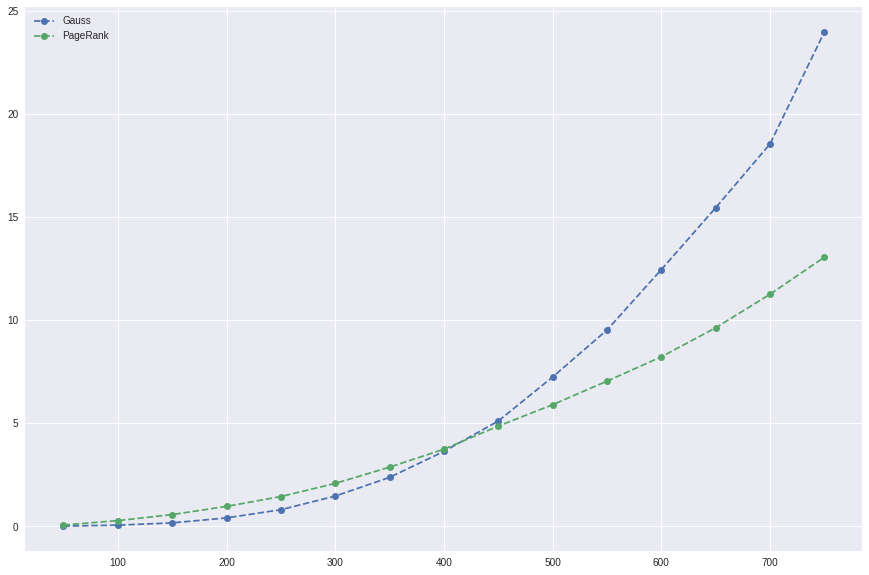

In [261]:
Tailles = [50*i for i in range(1,16)]
Tgauss, Tpage = [], []
for t in Tailles :
  grosweb = fabweb(t,(5,15))
  M = dictosyst(grosweb)
  start1 = time()
  Gauss(M,recherchePivotPartiel)
  muGauss = substitution(M)
  rang = 0
  for i in range(t) :
    if abs(M[i][i]) > 1e-9 :
      rang += 1
  print(f"n = {t}")
  stop1 = time()
  start2 = time()
  muPage = PageRank(grosweb)
  stop2 = time()
  Tgauss.append(stop1-start1)
  Tpage.append(stop2-start2)
  muGausstri = muGauss[:]
  muGausstri.sort()
  muPagetri = muPage[:]
  muPagetri.sort()
  print("  Top 5 Gauss : ",end="")
  for i in range(5) :
    print(f"{muGauss.index(muGausstri[i]):4}",end="")
  print("\n  Top 5 Page :  ",end="")
  for i in range(5) :
    print(f"{muPage.index(muPagetri[i]):4}",end="")
  print("\n")
plt.plot(Tailles,Tgauss,"o--",label="Gauss")
plt.plot(Tailles,Tpage,"o--",label="PageRank")
plt.legend()